# ODE's

## Forward Euler

In [30]:
graphics_toolkit ("gnuplot")

function [t,u] = ForwardEuler(f, tRange, u0, N)
    t = zeros(N+1,1);
    t(1) = tRange(1);
    h = (tRange(2)-tRange(1))/N;
    u(:,1) = u0;
    for n = 1 :N
        t(n+1) = t(n)+h;
        u(:,n+1)=u(:,n)+h*feval(f,t(n),u(:,n));
        disp(u(:,n+1))
    end
endfunction

function du = my_ode(t,u)
% du = my_ode(t,u) is the RHS function for the ODE u'=-u
% t is the independent variable
% u is the dependent variable
% du is u'
    du = -u;
endfunction

0.5000
0.2500
0.1250
0.062500


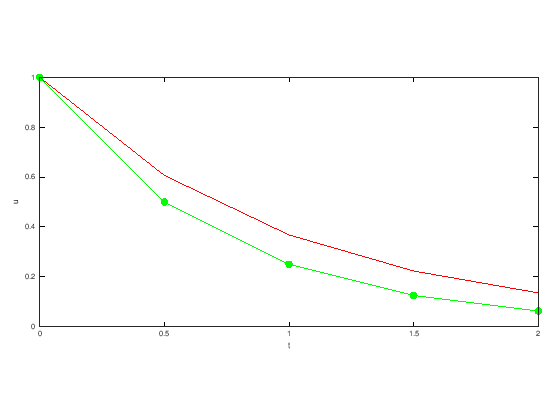

In [31]:
N = 4;
u0 = 1.0;
[t,u] = ForwardEuler("my_ode", [0.0,2.0], u0, N);
plot(t,u,'-go','MarkerFaceColor','g');
hold on
% [t1,u1] = BackwardEuler(y, [0.0,2.0], startValue, stepSize); % <- replaced "my_ode" with y
axis equal, axis([0 2 0 1]), xlabel('t'), ylabel('u')
% plot(t1,y1,'-b','LineWidth',2);
plot(t,exp(-t),'-r','LineWidth',2);

## Backward Euler

In [32]:
function [t,u] = BackwardEuler(f, tRange, u0, N)
% Use backward (implicit) Euler to solve a system of first order
% ODEs of the form u'=f(t,u). Here f = name of an m-file which
% defines "du = f(u,t)" to compute the RHS of the ODE as a row
% vector. tRange = [t0,t1], where the solution will be computed
% for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N  = number of equally-sized steps from t0 to t1
% t  = row vector of values of t
% u  = matrix whose n-th row is the approx. solution at t(n).

t      = zeros(N+1,1);                     % initialize t
t(1)   = tRange(1);
h      = (tRange(2)-tRange(1))/N;
u(:,1) = u0;                               % u0 (transpose)
for n = 1 : N
  t(n+1)   = t(n) + h;
  options = optimset('Display','off');
  [u(:,n+1),Fval,exitflag]  = fsolve(@(x) x - u(:,n) - ...
    h*feval(f,t(n+1),x),u(:,n),options);
end
endfunction

## CrankNicolson

In [33]:
function [t,u] = CrankNicolson(f, tRange, u0, N)
% Use Crank-Nicolson (trapezoidal rule) to solve a system of
% first order % ODEs of the form u'=f(t,u). Here f = name of
% an m-file which defines "du = f(u,t)" to compute the RHS of
% the ODE as a row vector. tRange = [t0,t1], where the u(t)
% will be computed for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N  = number of equally-sized steps from t0 to t1
% t  = row vector of values of t
% u  = matrix whose n-th row is the approx. solution at t(n).

t      = zeros(N+1,1);                     % initialize t
t(1)   = tRange(1);
h      = (tRange(2)-tRange(1))/N;
u(:,1) = u0;                               % u0 (transpose)
for n = 1 : N
  t(n+1)   = t(n) + h;
  options = optimset('Display','off');
  [u(:,n+1),Fval,exitflag]  = fsolve(@(x) x - u(:,n) - ...
    h/2*(feval(f,t(n),u(:,n)) + feval(f,t(n+1),x)),...
    u(:,n),options);
end
endfunction

## Euler Halfstep / RungeKutta2

In [34]:
function [t,u] = RK2(f, tRange, u0, N)
% Use halfstep Euler forward to solve a system of first order 
% ODEs of the form u’=f(t,u). Here f = name of an m-file which 
% defines "du = f(u,t)" to compute the RHS of the ODE as a row 
% vector. tRange = [t0,t1], where the solution will be computed 
% for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N = number of equally-sized steps from t0 to t1
% t =rowvectorofvaluesoft
% u = matrix whose n-th row is the approx. solution at t(n).

    t = zeros(N+1, 1);
    t(1) = tRange(1);
    h = (tRange(2)-tRange(1))/N;
    u(:, 1) = u0;
    for k = 1 : N
        tkp12 = t(k) + h / 2;
        ukp12 = u(:, k) + h * feval(f, t(k), u(:, k)) / 2;
        t(k+1) = t(k) + h;
        i(:, k+1) = u(:, k) + h *feval(f, tkp12, ukp12);
    end
endfunction

## RungeKutta3

In [35]:
function [t,u] = RK3(f, tRange, u0, N)
% Use halfstep Euler forward to solve a system of first order 
% ODEs of the form u’=f(t,u). Here f = name of an m-file which 
% defines "du = f(u,t)" to compute the RHS of the ODE as a row 
% vector. tRange = [t0,t1], where the solution will be computed 
% for t0<=t<=t1. Also
% u0 = column vector of initial values for u at t0
% N = number of equally-sized steps from t0 to t1
% t =rowvectorofvaluesoft
% u = matrix whose n-th row is the approx. solution at t(n).

    t = zeros(N+1, 1);
    t(1) = tRange(1);
    h = (tRange(2)-tRange(1))/N;
    u(:, 1) = u0;
    for k = 1 : N
        t1 = t(k) + h / 2;
        k1 = feval(f, t(k), u(:, k));
        k2 = feval(f, t1, u(:, k) + h*k1/2);
        t2 = t(k) + h;
        k3 = feval(f, t2, u(:,k) - h * k1 +2 *h *k2);
        u(:, k+1) = u(:, k) + h * (k1 + 4*k2 + k3);
    end
endfunction

## Jacobian

In [17]:
function [F, DF] = F_DF_ex1(x)
% [F, DF]:  function and corrsponding Jacobian
%
x1 = x(1);
x2 = x(2);
F = [x1^2 + x2^2 - 1; x1 - x2];
DF = [ 2*x1 2*x2; 1 -1 ];
endfunction

## Two Body Problem

In [13]:
function ydot = TwoBody(t,y)
r = sqrt(y(1)^2 + y(3)^2);
ydot = [y(2); -y(1)/r^3; y(4); -y(3)/r^3];
endfunction

In [14]:
function ComputeOrbits

  y0 = [1; 0; 0; 1];

  N  = 50;
  [t, y] = ForwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(1,:),y(3,:),'g-');
  hold on

  N  = 100;
  [t, y] = ForwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(1,:),y(3,:),'c-');

  N  = 50;
  [t, y] = BackwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(1,:),y(3,:),'b-');

  N  = 100;
  [t, y] = BackwardEuler('TwoBody',[0,pi],y0,N);
  plot(y(1,:),y(3,:),'m-');

  N  = 100;
  [t, y] = CrankNicolson('TwoBody',[0,2*pi],y0,N);
  plot(y(1,:),y(3,:),'r-');
  axis equal
  xlabel('u'), ylabel('v')
  axis([-1.5,1.8,-1.5,1.5])  

  plot(0,0,'ko')
  plot(1,0,'ro')

  legend('fE-50','fE-100','bE-50','bE-100','CN-100',5)
end

   1.000000
  -0.062832
   0.062832
   1.000000
   0.9961
  -0.1253
   0.1257
   0.9961
   0.9882
  -0.1871
   0.1882
   0.9883
   0.9764
  -0.2481
   0.2503
   0.9767
   0.9608
  -0.3080
   0.3117
   0.9613
   0.9415
  -0.3666
   0.3721
   0.9423
   0.9184
  -0.4236
   0.4313
   0.9198
   0.8918
  -0.4789
   0.4891
   0.8938
   0.8617
  -0.5321
   0.5453
   0.8646
   0.8283
  -0.5832
   0.5996
   0.8323
   0.7917
  -0.6319
   0.6519
   0.7971
   0.7520
  -0.6780
   0.7020
   0.7591
   0.7094
  -0.7214
   0.7497
   0.7186
   0.6640
  -0.7619
   0.7948
   0.6757
   0.6162
  -0.7995
   0.8373
   0.6308
   0.5659
  -0.8339
   0.8769
   0.5839
   0.5135
  -0.8652
   0.9136
   0.5355
   0.4592
  -0.8932
   0.9472
   0.4856
   0.4030
  -0.9180
   0.9777
   0.4346
   0.3454
  -0.9394
   1.0051
   0.3827
   0.2863
  -0.9575
   1.0291
   0.3300
   0.2262
  -0.9722
   1.0498
   0.2770
   0.1651
  -0.9837
   1.0672
   0.2237
   0.1033
  -0.9919
   1.0813
   0.1705
   0.040966
  -0.997002
   1.092

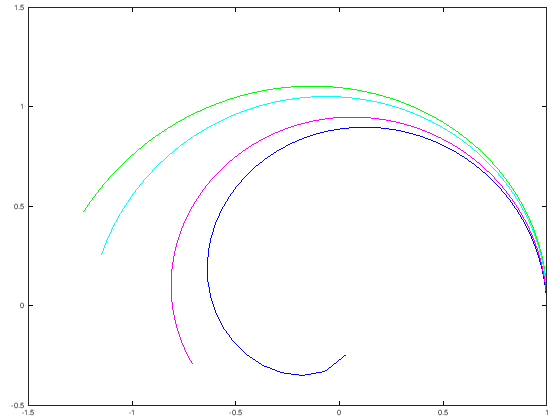

In [15]:
ComputeOrbits